<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
اهدای خون
</font>
</h1>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
موسسه مرکزی اهدای خون تایوان، به منظور تحلیل داده‌های خود و پیش‌بینی نیاز به خون در این کشور، اقدام به واگذاری داده‌ی خود به دانشگاه ملی تایوان کرده است. دانشگاه ملی تایوان پس از بررسی‌های ابتدایی و اعمال تغییرات گسترده و استفاده از تکنینک‌های تحلیل رفتاری، داده‌ی ابتدایی را به شکلی که در ادامه معرفی خواهد شد، تبدیل کرده است.
    <br>
    حال ما می‌خواهیم پیش‌بینی کنیم آیا شهروندان تایوانی در تاریخ خاصی خون اهدا می‌کنند یا خیر!
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [665]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این سوال دو مجموعه داده در اختیار داریم. توضیحات مجموعه داده آموزش را در جدول زیر مشاهده می‌کنید: 
    <br>
    هر سطر از این مجموعه داده، اطلاعات یک شهروند را نشان می‌دهد.
</font>
</p>

<center>
<div dir=rtl style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|نام ویژگی|توضیحات|
|:------:|:---:|
|<code>Recency (months)</code>|تعداد ماهی که از آخرین زمان اهدای خون توسط یک شهروند می‌گذرد|
|<code>Frequency (times)</code>|تعداد دفعاتی که در کل یک شهروند خون اهدا کرده است|
|<code>Monetary (c.c. blood)</code>|مقدار سانتی‌متر مکعب خونی که یک شهروند تا به حال اهدا کرده است|
|<code>Time (months)</code>|تعداد ماهی که از اولین زمان اهدای خون توسط یک شهروند می‌گذرد|
|<code>whether he/she donated blood in March 2007</code>|آیا شهروند در مارس ۲۰۰۷ خون اهدا کرده است یا خیر (ستون هدف مسئله!)|
    
</font>
</div>
</center>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>train.csv</code> و نمونه‌های آزمون که باید دسته‌ی آن‌ها را پیش‌بینی کنید در فایل <code>test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از دادگان آموزشی را به عنوان دادگان اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [666]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [667]:
x = train.iloc[:,:-1]
x

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,16,2,500,70
1,11,10,2500,35
2,13,4,1000,21
3,11,4,1000,27
4,4,5,1250,23
...,...,...,...,...
668,4,1,250,4
669,12,12,3000,58
670,4,2,500,13
671,4,1,250,4


In [668]:
y=train.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      1
      ..
668    0
669    0
670    0
671    0
672    1
Name: whether he/she donated blood in March 2007, Length: 673, dtype: int64

In [601]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)
X_sm, y_sm = sm.fit_resample(x, y)

In [602]:
X_sm

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,16,2,500,70
1,11,10,2500,35
2,13,4,1000,21
3,11,4,1000,27
4,4,5,1250,23
...,...,...,...,...
1021,2,21,5262,50
1022,13,8,2000,48
1023,2,5,1250,12
1024,6,5,1250,35


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

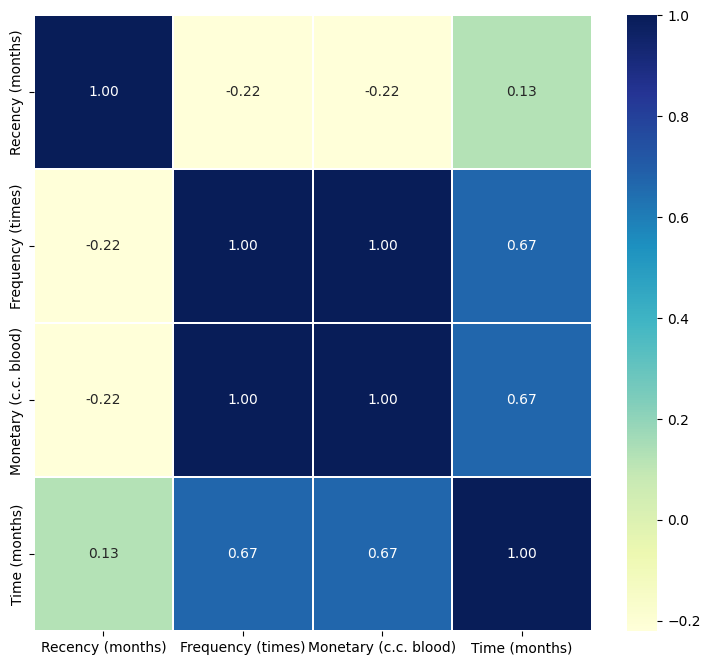

In [603]:
corrmat=X_sm.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True);

In [604]:
X_sm["Donating interval"] = (X_sm["Time (months)"] - X_sm["Recency (months)"])
X_sm.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donating interval
0,16,2,500,70,54
1,11,10,2500,35,24
2,13,4,1000,21,8
3,11,4,1000,27,16
4,4,5,1250,23,19


In [605]:
#X_sm.drop([ 'Frequency (times)'], axis=1, inplace=True)
#X_sm.drop([ 'Time (months)'], axis=1, inplace=True)
#X_sm.drop([ 'Recency (months)'], axis=1, inplace=True)
#X_sm.head()

In [606]:
X_sm

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donating interval
0,16,2,500,70,54
1,11,10,2500,35,24
2,13,4,1000,21,8
3,11,4,1000,27,16
4,4,5,1250,23,19
...,...,...,...,...,...
1021,2,21,5262,50,48
1022,13,8,2000,48,35
1023,2,5,1250,12,10
1024,6,5,1250,35,29


In [607]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale=MinMaxScaler()

#Fitting and transforming data
X_sm=scale.fit_transform(X_sm)

In [613]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_sm, y_sm, test_size=0.05, random_state=0)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
</font>
</p>


<h3 align=center style="direction: rtl; line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#cb1111">
    شما تنها و تنها می‌توانید از <code>LogisticRegression</code> و کتابخانه <code>scikit-learn</code> استفاده کنید. در صورت استفاده از کتابخانه یا مدل دیگری، هیچ امتیازی به شما تعلق نخواهد گرفت.
</font>
</h3>


In [656]:
# Model Target column :)
model = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [657]:
model.fit(x_train,y_train)

LogisticRegression(C=10, fit_intercept=False, max_iter=2000, n_jobs=-1,
                   random_state=123)

In [658]:
pred=model.predict(x_test)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    برای ارزیابی عملکرد مدل خود می‌توانید از معیار <code>f1_score</code> که در حالت <i>macro</i> میانگین‌گیری می‌کند، استفاده کنید. برای استفاده در کد می‌توانید به قطعه کد زیر توجه کنید.
    <br>
</font>
</p>

```
    from sklearn.metrics import f1_score
    print(f1_score(y_true, y_pred, average='macro'))
```


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    برای کسب اطلاعات بیشتر در مورد <code>macro f1_score</code> می توانید <a href="https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f#:~:text=The%20macro%2Daveraged%20F1%20score,regardless%20of%20their%20support%20values.&text=The%20value%20of%200.58%20we,score%20in%20our%20classification%20report.">این لینک</a> را مطالعه کنید.
</font>
</p>



In [659]:
# Evaluete model :)
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, pred))
print(f1_score(y_test, pred, average='macro'))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        24
           1       0.82      0.64      0.72        28

    accuracy                           0.73        52
   macro avg       0.74      0.74      0.73        52
weighted avg       0.75      0.73      0.73        52

0.7303703703703704


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدلسازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای وابسته به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول (<code>dataframe</code>) زیر آماده کنید.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|prediction|آیا شهروند در مارس ۲۰۰۷ خون اهدا کرده است یا خیر|
    
</font>
</div>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اسم دیتافریم باید <i>submission</i> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل ۱ ستون با اسم <i>prediction</i> است و ۷۵ سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <i>test</i> شما باید یک مقدار پیشبینی شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، اعداد ستون <i>prediction</i> ممکن است متفاوت باشد.
</font>
</p>

<div style="text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
||prediction|
|----|-----|
|0|0|
|1|0|
|2|0|
|3|1|
|4|0|

</font>
</div>



In [660]:
test["Donating interval"] = (test["Time (months)"] - test["Recency (months)"])
test.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donating interval
0,14,5,1250,28,14
1,13,3,750,14,1
2,4,11,2750,28,24
3,21,2,500,35,14
4,16,8,2000,76,60


In [661]:
#test.drop([ 'Frequency (times)'], axis=1, inplace=True)
#test.drop([ 'Time (months)'], axis=1, inplace=True)
#test.drop([ 'Recency (months)'], axis=1, inplace=True)
test.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donating interval
0,14,5,1250,28,14
1,13,3,750,14,1
2,4,11,2750,28,24
3,21,2,500,35,14
4,16,8,2000,76,60


In [662]:
test =scale.transform(test)

In [663]:
submission = pd.DataFrame(model.predict(test))
submission.columns = ['prediction']
submission

,prediction
0,0
1,0
2,1
3,0
4,0
...,...
70,1
71,1
72,1
73,1


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید.
    <br>
    فایل <code>result.zip</code> را در کوئرا می‌بایست آپلود کنید و منتظر نتیجه داوری بمانید!
    <br>
    این فایل شامل <code>submission.csv</code> ، همین نوت‌بوک که در حال کد زدن داخل آن هستید و مدل ذخیره‌شده‌ی شماست.
</font>
</p>

In [664]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)


joblib.dump(model, 'model')
submission.to_csv('submission.csv', index=False)

file_names = ['model', 'submission.csv', 'blood_donation.ipynb']
compress(file_names)

File Paths:
['model', 'submission.csv', 'blood_donation.ipynb']
